# Diagnosing Bias And Variance Lab

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
from google.colab import files

In [5]:
!cp /content/drive/MyDrive/Datasets/utils.py /content

In [6]:
!cp /content/drive/MyDrive/Datasets/data/c2w3_lab2_data1.csv /content

In [7]:
!cp /content/drive/MyDrive/Datasets/data/c2w3_lab2_data2.csv /content

In [8]:
!cp /content/drive/MyDrive/Datasets/data/c2w3_lab2_data3.csv /content

In [9]:
!cp /content/drive/MyDrive/Datasets/data/c2w3_lab2_data4.csv /content

In [10]:
!cp /content/drive/MyDrive/Datasets/deeplearning.mplstyle /content

In [11]:
# for building linear regression models
from sklearn.linear_model import LinearRegression, Ridge

# import lab utility functions in utils.py
import utils

## Fixing High Bias

We will first look at things to try when your model is underfitting. In other words, when the training error is far worse than the baseline level of performance.

### Try Adding Polynomial Features

Adding polynomial features can help our model learn more complex patterns in your data. Here again is an example of a plot showing how the training and cross validation errors change as you add more polynomial features.

We will be using a synthetic dataset for a regression problem with one feature and one target. In addition,we will also define an arbitrary baseline performance and include it in the plot.

the shape of the training set (input) is: (60, 1)
the shape of the training set (target) is: (60,)

the shape of the cross validation set (input) is: (20, 1)
the shape of the cross validation set (target) is: (20,)

first 5 rows of the training inputs (1 feature):
 [[3757.57575758]
 [2878.78787879]
 [3545.45454545]
 [1575.75757576]
 [1666.66666667]]



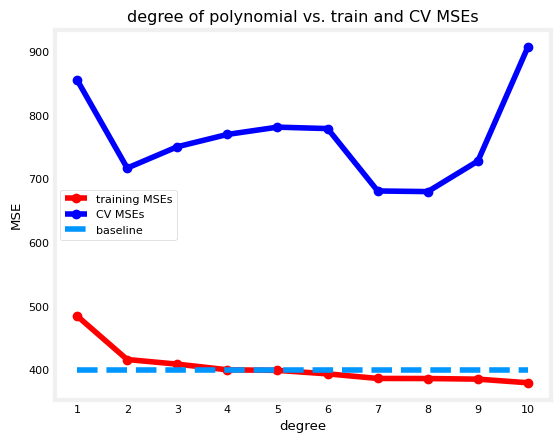

In [14]:
# Split the dataset into train, cv, and test
x_train, y_train, x_cv, y_cv, x_test, y_test = utils.prepare_dataset('./c2w3_lab2_data1.csv')

print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")

# Preview the first 5 rows
print(f"first 5 rows of the training inputs (1 feature):\n {x_train[:5]}\n")

# Instantiate the regression model class
model = LinearRegression()

# Train and plot polynomial regression models
utils.train_plot_poly(model, x_train, y_train, x_cv, y_cv, max_degree=10, baseline=400)

As we can see, the more polynomial features we add, the better the model fits to the training data. In this example, it even performed better than the baseline. At this point, we can say that the models with degree greater than 4 are low-bias because they perform close to or better than the baseline.

However, if the baseline is defined lower (e.g. we consulted an expert regarding the acceptable error), then the models are still considered high bias. We can then try other methods to improve this.

### Try Getting Additional Features

Another thing we can try is to acquire other features. Let's say that after we got the results above, we decided to launch another data collection campaign that captures another feature. Our dataset will now have 2 columns for the input features as shown below.

In [15]:
x_train, y_train, x_cv, y_cv, x_test, y_test = utils.prepare_dataset('./c2w3_lab2_data2.csv')

print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")

# Preview the first 5 rows
print(f"first 5 rows of the training inputs (2 features):\n {x_train[:5]}\n")

the shape of the training set (input) is: (60, 2)
the shape of the training set (target) is: (60,)

the shape of the cross validation set (input) is: (20, 2)
the shape of the cross validation set (target) is: (20,)

first 5 rows of the training inputs (2 features):
 [[3.75757576e+03 5.49494949e+00]
 [2.87878788e+03 6.70707071e+00]
 [3.54545455e+03 3.71717172e+00]
 [1.57575758e+03 5.97979798e+00]
 [1.66666667e+03 1.61616162e+00]]



Now we see what this does to the same training process as before. We'll notice that the training error is now closer to (or even better than) the baseline.

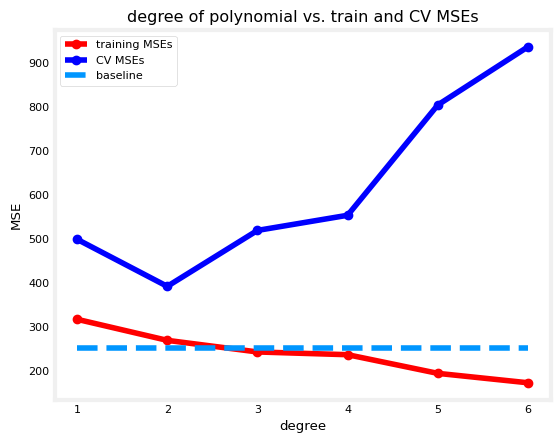

In [16]:
# Instantiate the model class
model = LinearRegression()

# Train and plot polynomial regression models. Dataset used has two features.
utils.train_plot_poly(model, x_train, y_train, x_cv, y_cv, max_degree=6, baseline=250)

### Try Decreasing the Regularization Parameter

At this point, we might want to introduce regularization to avoid overfitting. One thing to watch out for is we might make our models underfit if you set the regularization parameter too high. The cell below trains a 4th degree polynomial model using the [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) class which allows us to set a regularization parameter (i.e. lambda or $\lambda$). We will try several values and compare the results.

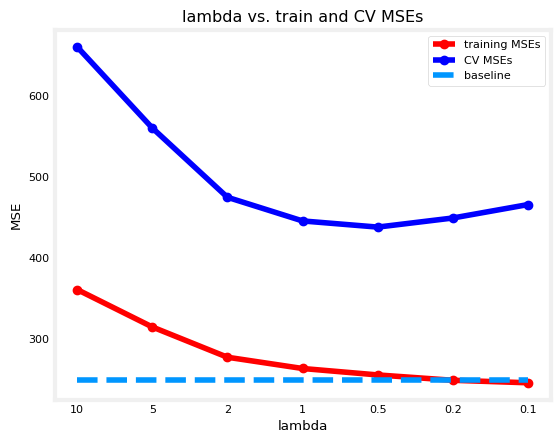

In [17]:
# Define lambdas to plot
reg_params = [10, 5, 2, 1, 0.5, 0.2, 0.1]

# Define degree of polynomial and train for each value of lambda
utils.train_plot_reg_params(reg_params, x_train, y_train, x_cv, y_cv, degree= 4, baseline=250)

The resulting plot shows an initial $\lambda$ of `10` and as we can see, the training error is worse than the baseline at that point. This implies that it is placing a huge penalty on the `w` parameters and this prevents the model from learning more complex patterns in our data. As we decrease $\lambda$, the model loosens this restriction and the training error is able to approach the baseline performance.

## Fixing High Variance

We will now look at some things to try when your model has overfit the training set. The main objective is to have a model that generalizes well to new examples so you want to minimize the cross validation error.

### Try Increasing the Regularization Parameter

As shown below, we can improve our cross validation error by increasing the value of $\lambda$.

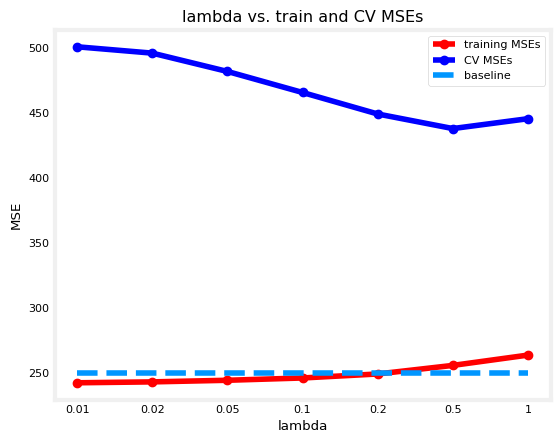

In [18]:
# Define lambdas to plot
reg_params = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1]

# Define degree of polynomial and train for each value of lambda
utils.train_plot_reg_params(reg_params, x_train, y_train, x_cv, y_cv, degree= 4, baseline=250)

### Try Smaller Set of Features

To illustrate how removing features can improve performance, we will do polynomial regression for 2 datasets: the same data you used above (2 features) and another with a random ID column (3 features). We can preview these using the cell below. Notice that 2 columns are identical and a 3rd one is added to include random numbers.

In [19]:
# Prepare dataset with randomID feature
x_train, y_train, x_cv, y_cv, x_test, y_test = utils.prepare_dataset('./c2w3_lab2_data2.csv')

# Preview the first 5 rows
print(f"first 5 rows of the training set with 2 features:\n {x_train[:5]}\n")

# Prepare dataset with randomID feature
x_train, y_train, x_cv, y_cv, x_test, y_test = utils.prepare_dataset('./c2w3_lab2_data3.csv')

# Preview the first 5 rows
print(f"first 5 rows of the training set with 3 features (1st column is a random ID):\n {x_train[:5]}\n")

first 5 rows of the training set with 2 features:
 [[3.75757576e+03 5.49494949e+00]
 [2.87878788e+03 6.70707071e+00]
 [3.54545455e+03 3.71717172e+00]
 [1.57575758e+03 5.97979798e+00]
 [1.66666667e+03 1.61616162e+00]]

first 5 rows of the training set with 3 features (1st column is a random ID):
 [[1.41929130e+07 3.75757576e+03 5.49494949e+00]
 [1.51868310e+07 2.87878788e+03 6.70707071e+00]
 [1.92662630e+07 3.54545455e+03 3.71717172e+00]
 [1.25222490e+07 1.57575758e+03 5.97979798e+00]
 [1.76537960e+07 1.66666667e+03 1.61616162e+00]]



Now we will train the models and plot the results. The solid lines in the plot show the errors for the data with 2 features while the dotted lines show the errors for the dataset with 3 features. As we can see, the one with 3 features has higher cross validation error especially as you introduce more polynomial terms. This is because the model is also trying to learn from the random IDs even though it has nothing to do with the target.

Another way to look at it is to observe the points at degree=4. We'll notice that even though the *training error* is lower with 3 features, the *gap between the training error and cross validation error* is a lot wider than when you only use 2 features. This should also warn that the model is overfitting.

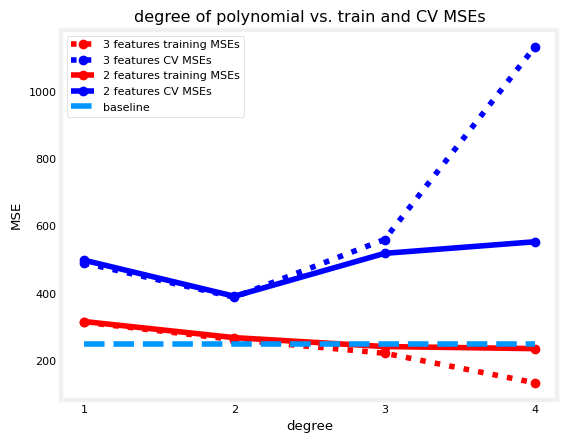

In [20]:
# Define the model
model = LinearRegression()

# Define properties of the 2 datasets
file1 = {'filename':'./c2w3_lab2_data3.csv', 'label': '3 features', 'linestyle': 'dotted'}
file2 = {'filename':'./c2w3_lab2_data2.csv', 'label': '2 features', 'linestyle': 'solid'}
files = [file1, file2]

# Train and plot for each dataset
utils.train_plot_diff_datasets(model, files, max_degree=4, baseline=250)

### Get More Training Examples

Lastly, we can try to minimize the cross validation error by getting more examples. In the cell below, we will train a 4th degree polynomial model then plot the *learning curve* of your model to see how the errors behave when we get more examples.

the shape of the entire training set (input) is: (600, 2)
the shape of the entire training set (target) is: (600,)

the shape of the entire cross validation set (input) is: (200, 2)
the shape of the entire cross validation set (target) is: (200,)



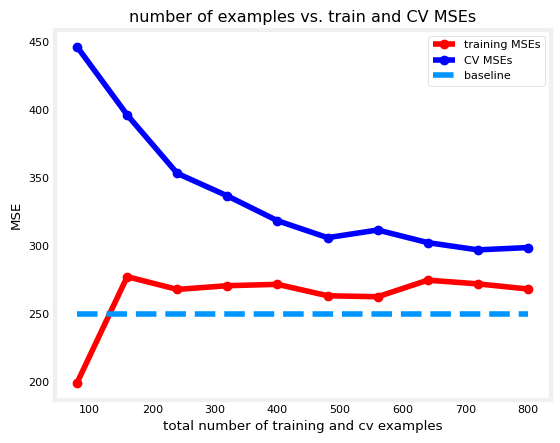

In [21]:
# Prepare the dataset
x_train, y_train, x_cv, y_cv, x_test, y_test = utils.prepare_dataset('./c2w3_lab2_data4.csv')
print(f"the shape of the entire training set (input) is: {x_train.shape}")
print(f"the shape of the entire training set (target) is: {y_train.shape}\n")
print(f"the shape of the entire cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the entire cross validation set (target) is: {y_cv.shape}\n")

# Instantiate the model class
model = LinearRegression()

# Define the degree of polynomial and train the model using subsets of the dataset.
utils.train_plot_learning_curve(model, x_train, y_train, x_cv, y_cv, degree= 4, baseline=250)

From the results, it shows that the cross validation error starts to approach the training error as we increase the dataset size. Another insight we can get from this is that adding more examples will not likely solve a high bias problem. That's because the training error remains relatively flat even as the dataset increases.